# **Estimating Parameters of a Gamma Distribution**

**Import Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
%matplotlib inline

# Data Generation

-Use at least five different size scales for n and use 10 different settings of α and β
- 5 Different Sample Sizes
- Randomize 10 different Alpha and Beta pairs

In [7]:
SampleSize = [100, 500, 1000, 5000, 10000]
parameters = [
    (1, 3), (2, 6), (3, 2), (4, 8), (5, 9),
    (6, 1), (7, 4), (8, 7), (9, 5), (10, 10)]

# MLE & MME

Obtain the log-likelihood of the gamma function. HINT: You can use the
stats.gamma.logpdf function

Minimize the negative log-likelihood using the scipy minimize function

$$
\text{The likelihood function for the Gamma distribution with rate parameter } \beta \text{ is:}
$$

$$
L(\alpha, \beta \mid x_1, x_2, \dots, x_n) = \prod_{i=1}^{n} \frac{\beta^\alpha}{\Gamma(\alpha)} x_i^{\alpha - 1} e^{-\beta x_i}
$$

$$
\text{The log-likelihood function is:}
$$

$$
\ell(\alpha, \beta) = n \alpha \log \beta - n \log \Gamma(\alpha) + (\alpha - 1) \sum_{i=1}^{n} \log x_i - \beta \sum_{i=1}^{n} x_i
$$


$$
\text{Taking the derivatives of the log-likelihood function with respect to } \alpha \text{ and } \beta, \text{ we obtain:}
$$

### For ( β ):

$$
\frac{\partial \ell}{\partial \beta} = \frac{n \alpha}{\beta} - \sum_{i=1}^{n} x_i = 0
$$

Solving for ( B̂ ):

$$
\hat{\beta} = \frac{n \alpha}{\sum_{i=1}^{n} x_i} = \frac{\alpha}{\bar{x}}
$$

---

### For \( 	α \):
we use the digamma function \( ψ(α) \):

$$
\frac{\partial \ell}{\partial \alpha} = n \log \beta - n ψ(α) + \sum_{i=1}^{n} \log x_i = 0
$$

Solving for \( α \):

$$
\log \hat{\beta} - \psi(\hat{\alpha}) + \frac{1}{n} \sum_{i=1}^{n} \log x_i = 0
$$

### **Method of Moments Estimators (MME)**

For the method of moments, we use the fact that the **mean** and **variance** of the Gamma distribution are:

$$
\mu = \frac{\alpha}{\beta}, \quad \sigma^2 = \frac{\alpha}{\beta^2}
$$

Using sample moments, we estimate the mean and variance:

$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i, \quad \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \hat{\mu})^2
$$

Now, solving for \( α \) and \( β \):

### For \( β \):

$$
\hat{\beta} = \frac{\hat{\alpha}}{\hat{\mu}}
$$

### For \( α \):

$$
\hat{\alpha} = \frac{\hat{\mu}^2}{\hat{\sigma}^2}
$$

In [8]:
def MLE(data, initial=(1.0, 1.0)):
    def neg_log_lik(params):
        a, b = params
        if a <= 0 or b <= 0:
            return np.inf
        return -np.sum(stats.gamma.logpdf(data, a, scale=b))
    res = minimize(neg_log_lik, initial, bounds=[(1e-6, None), (1e-6, None)])
    return res.x

def MME(data):
    x_bar = np.mean(data)
    s2 = np.var(data, ddof=0)
    alpha_hat = x_bar**2 / s2
    beta_hat = s2 / x_bar
    return alpha_hat, beta_hat

# Simulation, Estimation, and Plotting
Run simulations for each combination of sample size and true parameters, then compute estimates, then plot the result of that

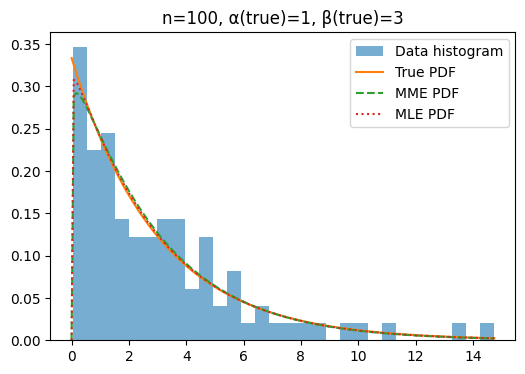

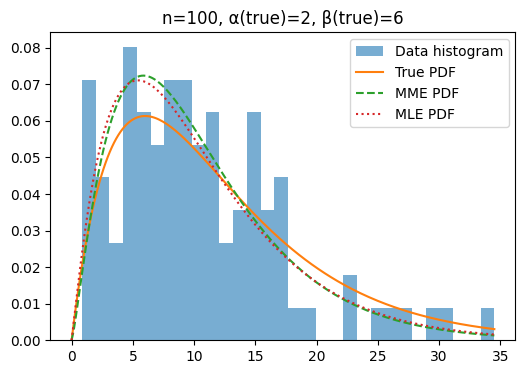

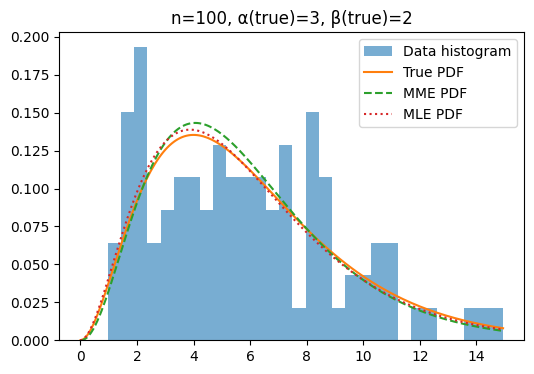

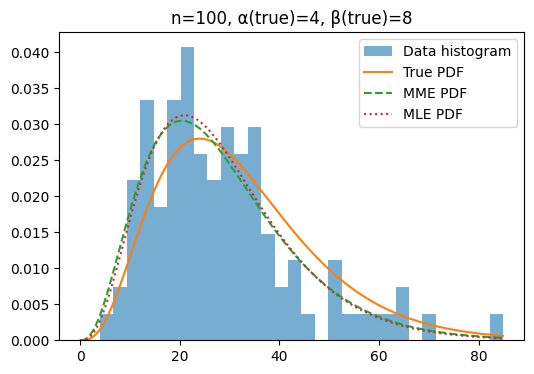

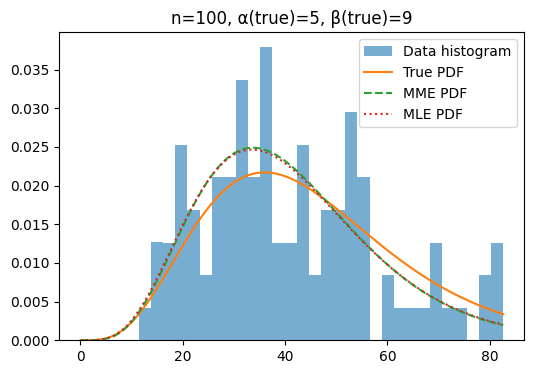

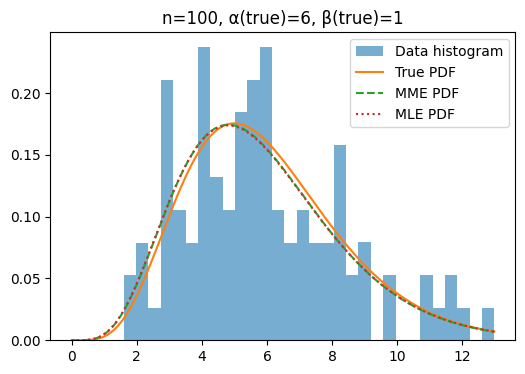

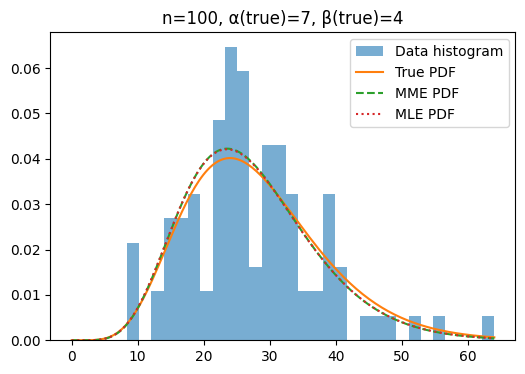

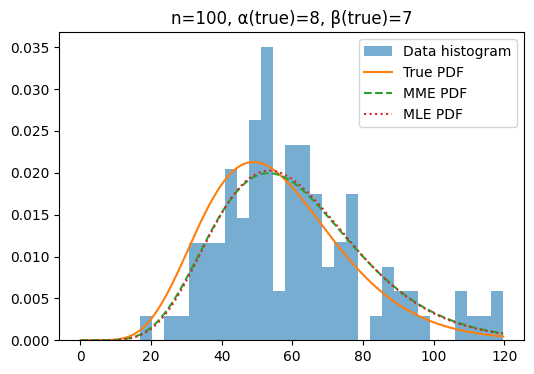

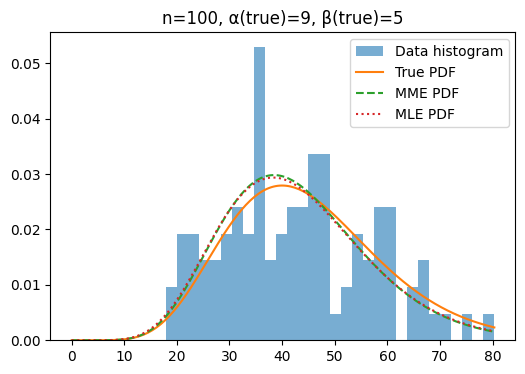

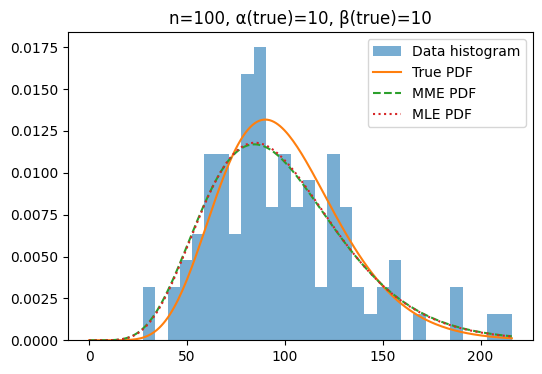

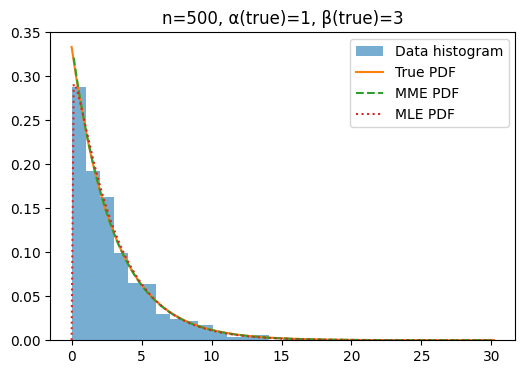

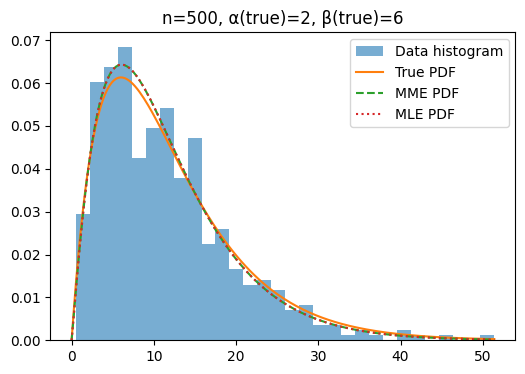

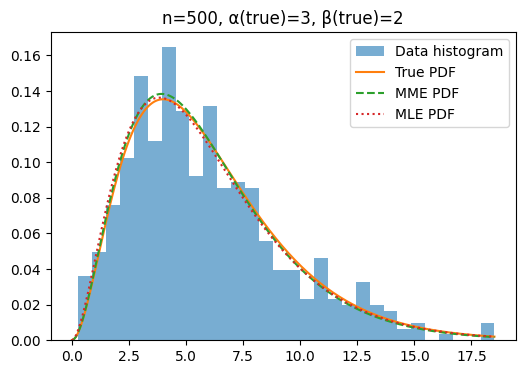

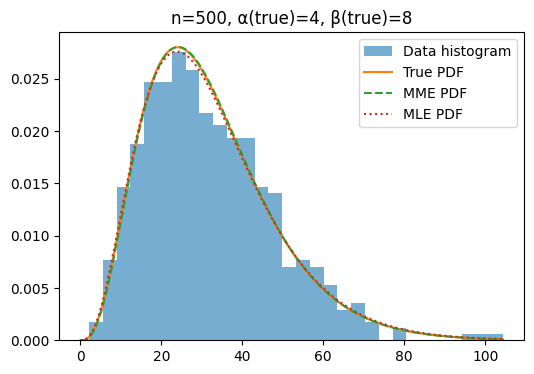

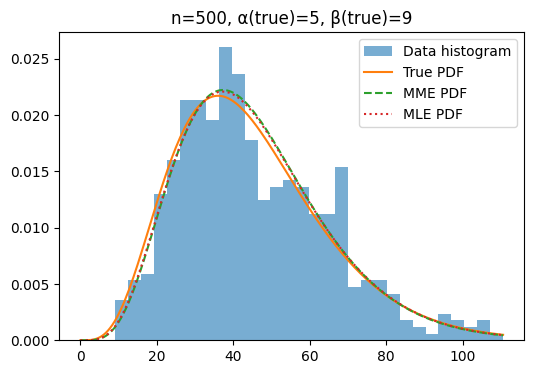

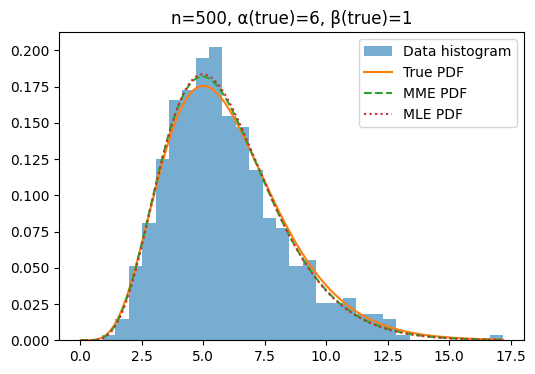

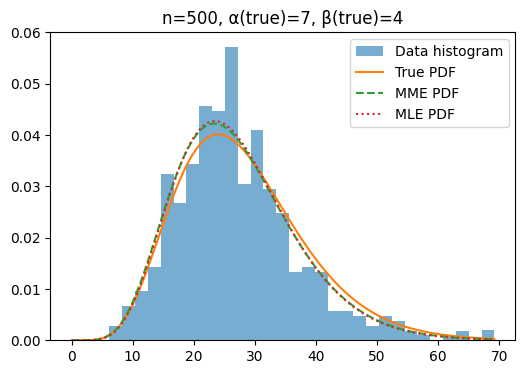

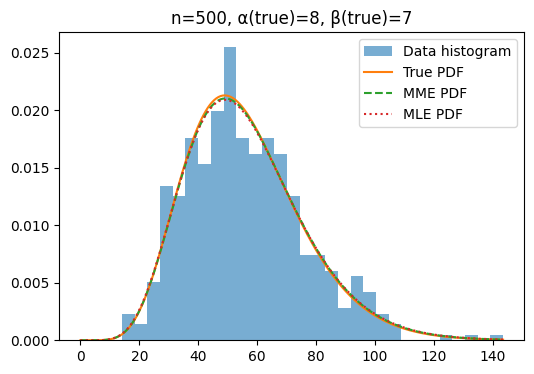

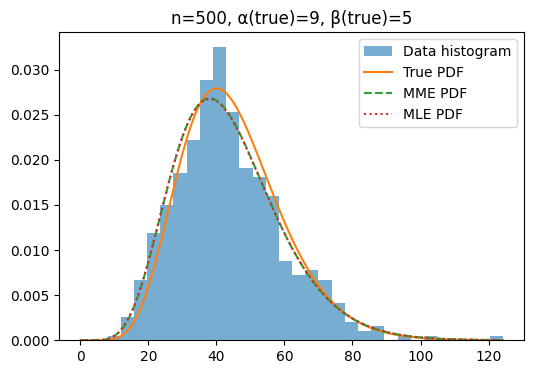

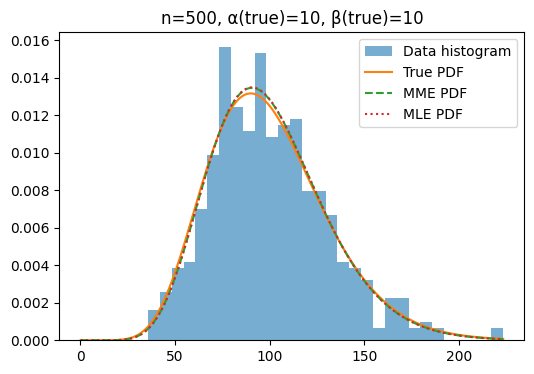

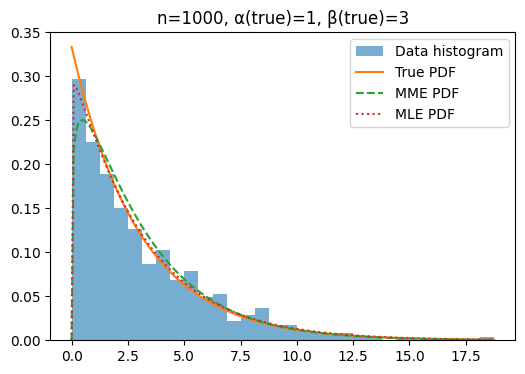

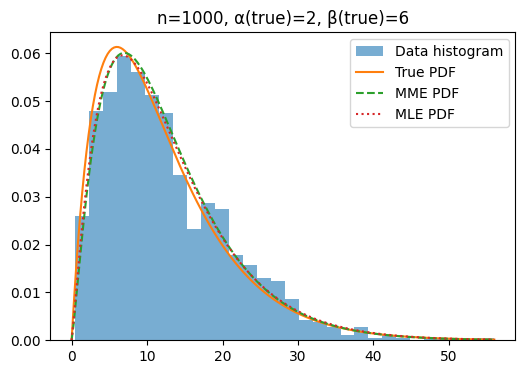

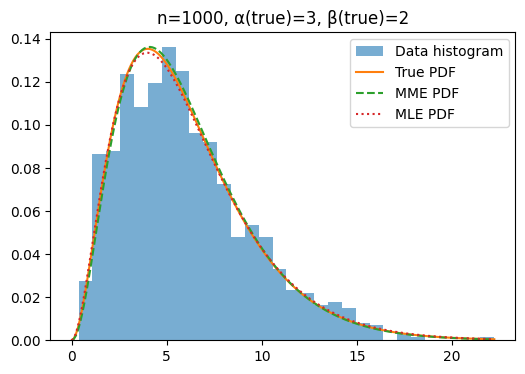

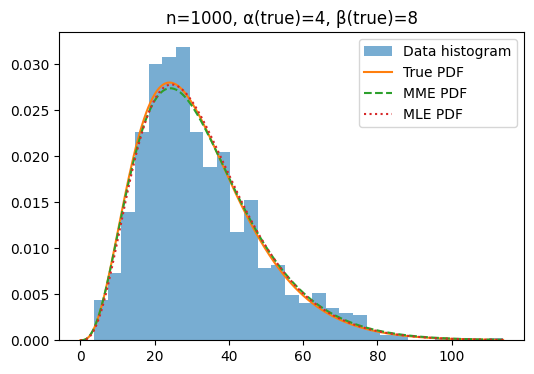

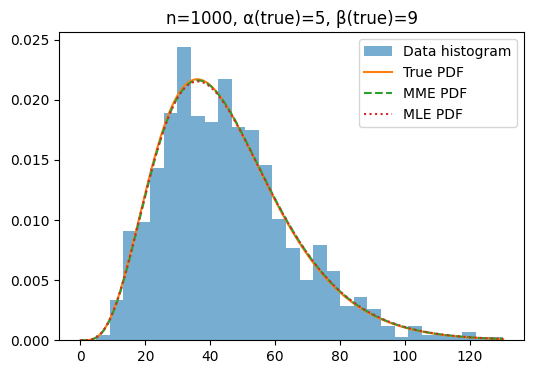

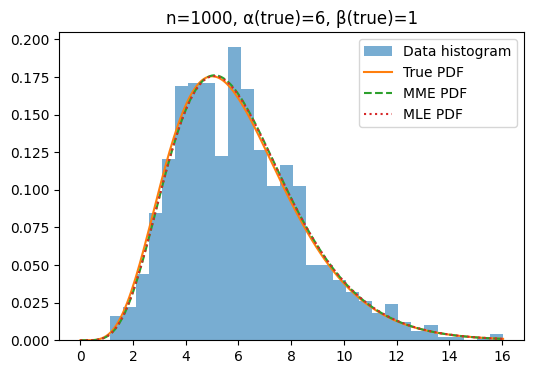

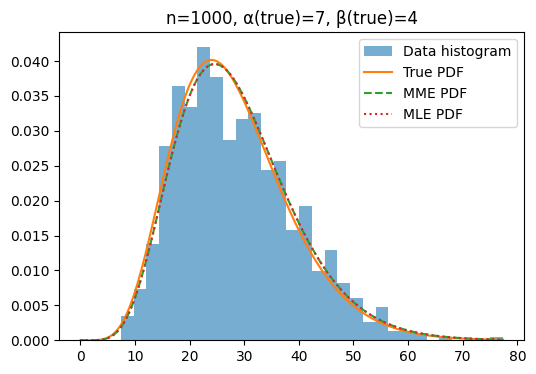

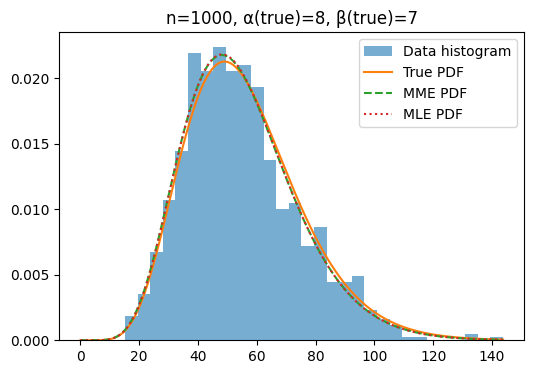

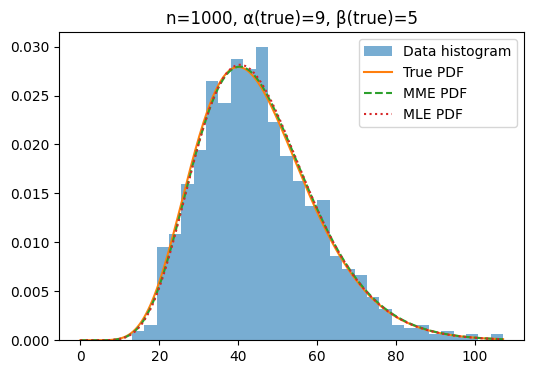

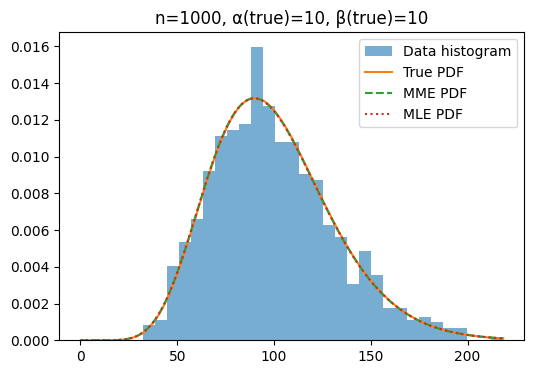

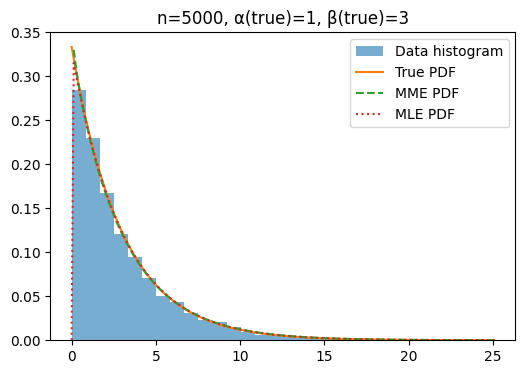

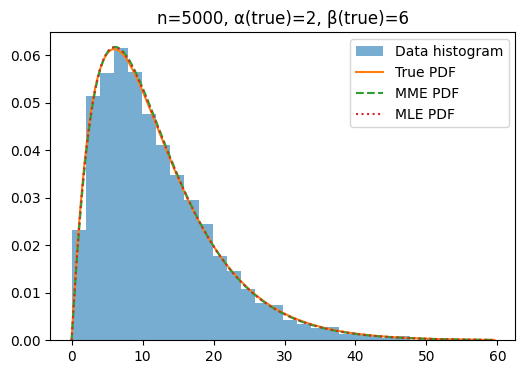

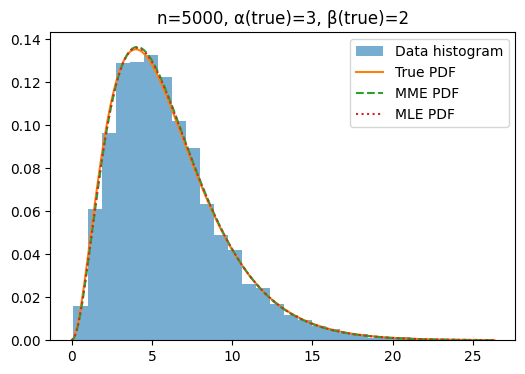

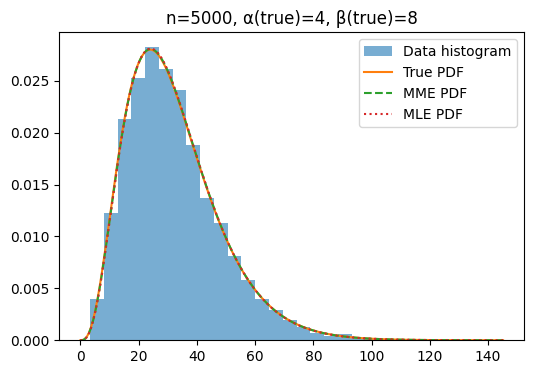

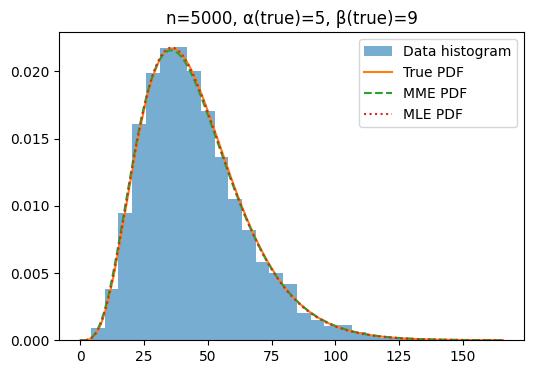

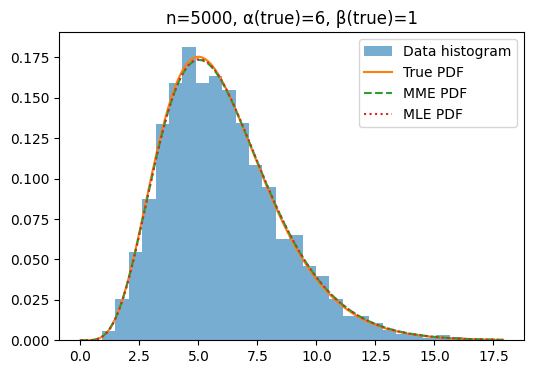

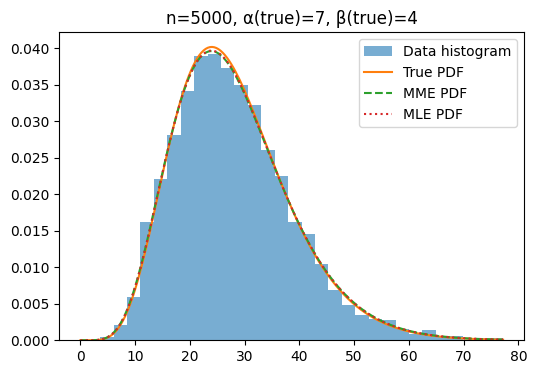

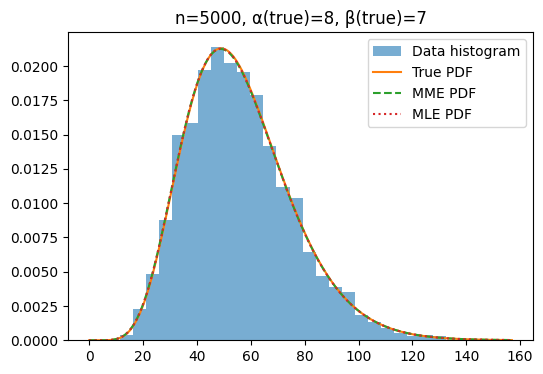

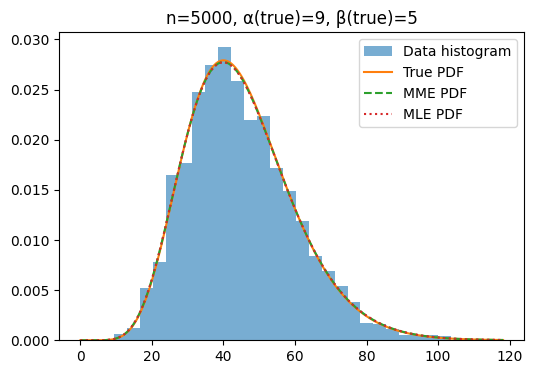

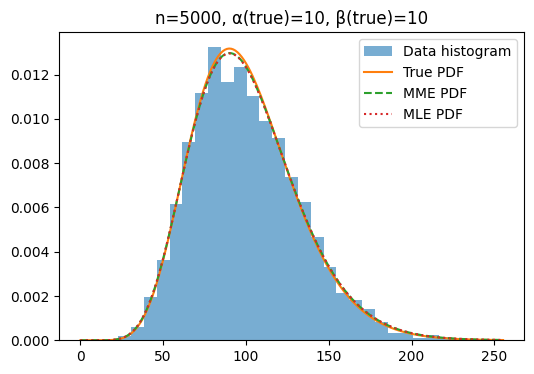

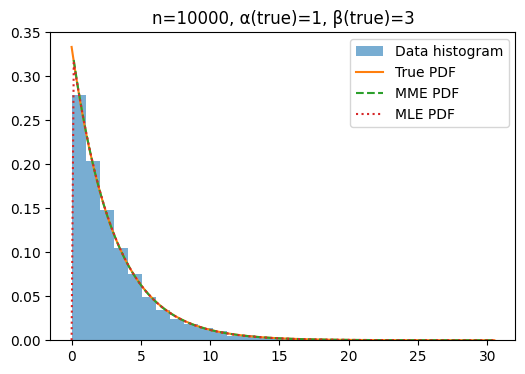

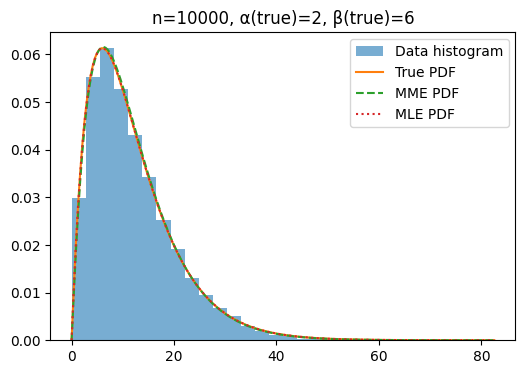

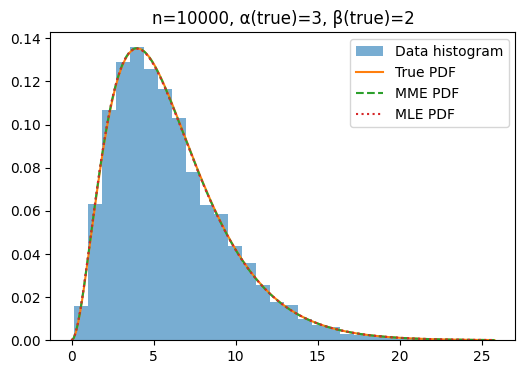

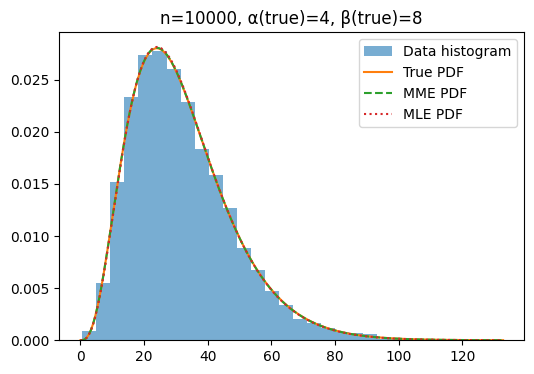

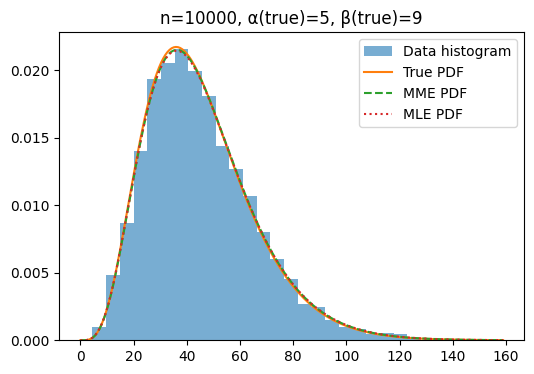

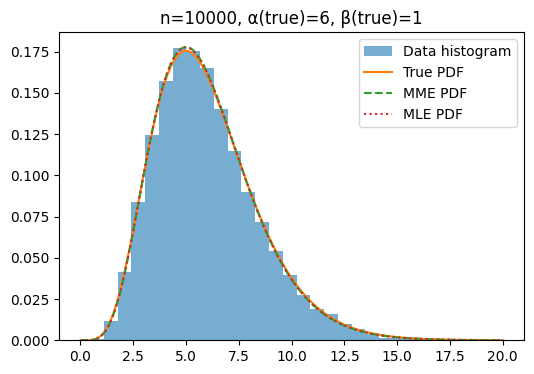

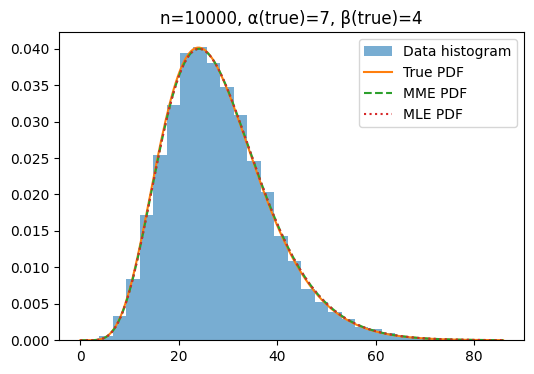

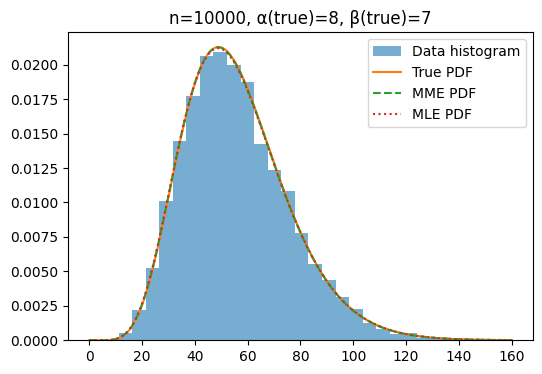

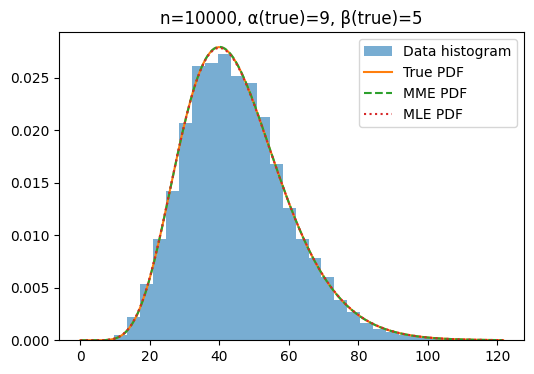

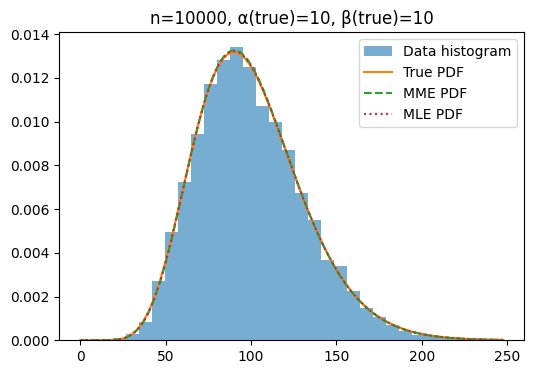

In [9]:
results = []
for n in SampleSize:
    for alpha_true, beta_true in parameters:
        # Generate gamma-distributed data
        data = np.random.gamma(alpha_true, beta_true, size=n)

        # Calculate MME and MLE estimates
        alpha_mme, beta_mme = MME(data)

        # MLE estimates using the true parameters as initial guesses
        alpha_mle, beta_mle = MLE(data, initial=(alpha_true, beta_true))
        
        # Create a new figure for the current simulation
        plt.figure(figsize=(6, 4))
        
        # Plot the data histogram
        plt.hist(data, bins=30, density=True, alpha=0.6, label='Data histogram')
        
        # Generate x values for plotting the PDFs over the range of the data
        x = np.linspace(0, data.max(), 200)
        
        # Plot the true gamma PDF
        plt.plot(x, stats.gamma.pdf(x, alpha_true, scale=beta_true), label='True PDF')
        
        # Plot the MME-based gamma PDF with dashed line
        plt.plot(x, stats.gamma.pdf(x, alpha_mme, scale=beta_mme), '--', label='MME PDF')
        
        # Plot the MLE-based gamma PDF with dotted line
        plt.plot(x, stats.gamma.pdf(x, alpha_mle, scale=beta_mle), ':', label='MLE PDF')
        
        # Add a title to identify the current parameters and sample size
        plt.title(f"n={n}, α(true)={alpha_true}, β(true)={beta_true}")
        
        # Display the legend to distinguish each plot
        plt.legend()
        
        # Show the plot
        plt.show()

